In [56]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = tf.keras.datasets.fashion_mnist # load dataset
(train_images, train_Labels), (test_images, test_Labels) = fashion.load_data()

In [3]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
test_images.shape

(10000, 28, 28)

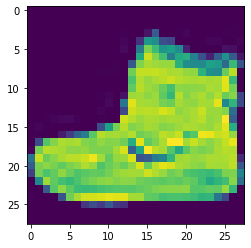

9


In [5]:
#showing the first picture of out test data
plt.imshow(train_images[0])
plt.show()

#every label is determine to an object 
print(train_Labels[0])

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images = train_images / 255

# Normalize the images
test_images = test_images / 255

In [64]:
def show_25(images, labels):
    
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

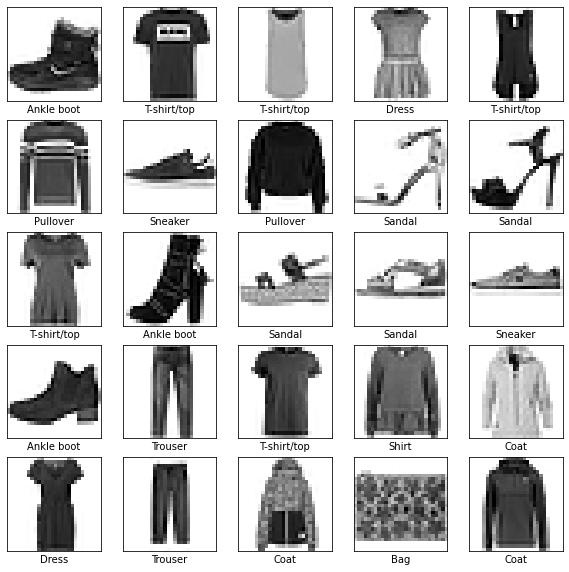

In [66]:
show_25(train_images, train_Labels)

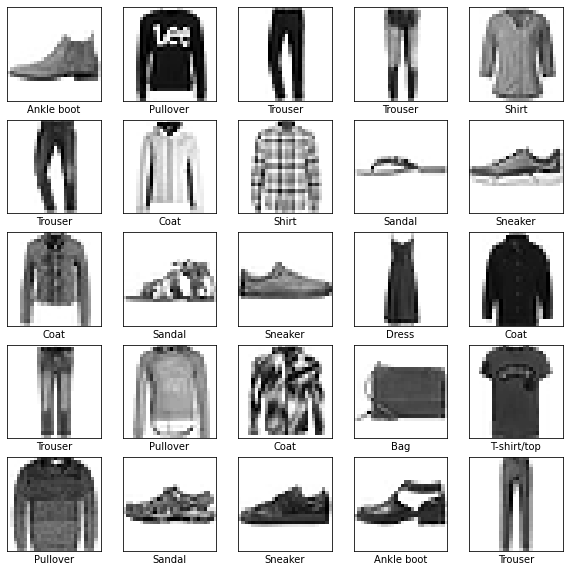

In [67]:
show_25(test_images, test_Labels)

In [22]:
model = Sequential()

#model.add(Dense(128, input_dim = 784, activation='relu'))
#model.add(Dense(10))

#second way(flattening model)
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

#compiling model
#loss function is used to measure how well the model did on training
#SparseCategoricalCrossentropy is used because the labels are integers
#optimizer is used to adjust the weights of the model to minimize the loss
#adam is used because it is a good default optimizer
#metrics is used to monitor the training and testing steps
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
h = model.fit(train_images, train_Labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4941 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3765 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3125 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2947 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2680 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2558 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [24]:
out1 = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [68]:
test_loss, test_acc = model.evaluate(test_images, test_Labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 900us/step - loss: 0.3419 - accuracy: 0.8779
Test accuracy: 0.8779000043869019


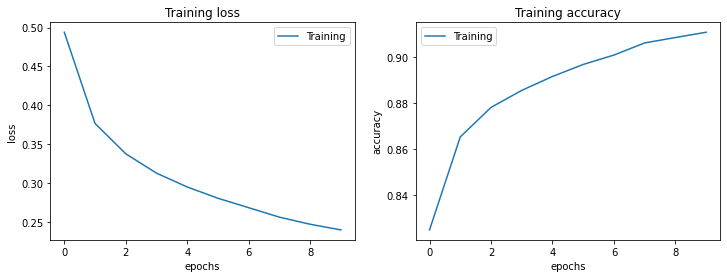

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, label in zip(axes, ['loss', 'accuracy']):
    ax.plot(h.history[label], label='Training')
    ax.legend()
    ax.set_xlabel('epochs')
    ax.set_ylabel(label)
    ax.set_title(f'Training {label}')
plt.show()

In [26]:
from keras_visualizer import visualizer

visualizer(model, file_name='model',file_format='png', view=True)

In [78]:
import cv2

img = cv2.imread('images (2).jpg')
print(img.shape)


(275, 183, 3)


In [79]:
# If your image is in 0-1 range (float)
if img.dtype == np.float64 or img.dtype == np.float32:
    img = (img * 255).astype(np.uint8)

# Then proceed with your operations
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img / 255  # Scale back to 0-1 if needed

In [80]:

print(img.shape)

(28, 28)


In [81]:
#predicting the image
prediction = model.predict(img.reshape(1, 28, 28))

1/1 [==============================] - 0s 30ms/step


In [82]:
print(prediction)

[[ -9.196885   -4.949816   -7.1172338  -1.3995436  -7.178202   -7.2780585
   -7.6797347  -9.439961    0.7558473 -11.5094595]]


In [83]:
print(class_names[np.argmax(prediction)])

Bag
